<a href="https://colab.research.google.com/github/Venkata-Sai-Prakash-Yerramsetti/CMPE257-Fall23-Venkata-Sai-Prakash-Yerramsetti/blob/homework-1/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive/


<ipython-input-1-52de563936d3>:30: RuntimeWarning: overflow encountered in multiply
  w=w+si*(float(y[i])-(np.dot(np.transpose(w),x[i]))* x[i])
<ipython-input-1-52de563936d3>:30: RuntimeWarning: invalid value encountered in add
  w=w+si*(float(y[i])-(np.dot(np.transpose(w),x[i]))* x[i])
<ipython-input-1-52de563936d3>:18: RuntimeWarning: invalid value encountered in double_scalars
  c=-w[0] / w[2]
<ipython-input-1-52de563936d3>:19: RuntimeWarning: invalid value encountered in double_scalars
  m = -w[1] / w[2]


Accuracy: 100.0
Accuracy: 100.0
Accuracy: 87.34
Accuracy: 88.16


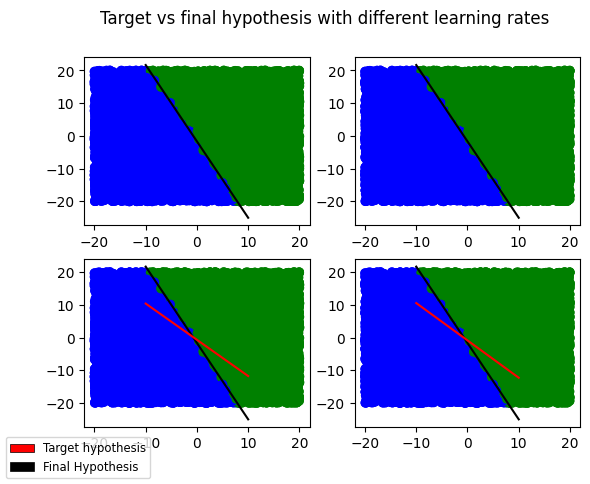

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from google.colab import drive
drive.mount('/content/drive/')

# Error Calculation
def miss_class(w,x,y):
  miss=0
  for j in range(0,len(x)):
    if (y[j]*(np.dot(np.transpose(w),x[j]))<=0):
      miss+=1
  return miss

def plotting(w,myData,clr,axis):
  c=-w[0] / w[2]
  m = -w[1] / w[2]
  tar = np.linspace(-10, 10)
  line = m*tar+c
  axis.scatter(myData[1], myData[2], c=['green' if label == 1 else 'blue' for label in myData[3]])
  axis.plot(tar, line, color=clr)

def pla_modify(w,x,y,si,myData,axis):
  iter=0
  while (miss_class(w,x,y)!=0 or iter==1000):
    for i in range(0,len(x)):
      if (y[i]*(np.dot(np.transpose(w),x[i]))<=1):
        w=w+si*(float(y[i])-(np.dot(np.transpose(w),x[i]))* x[i])
        iter+=1
        if(miss_class(w,x,y)==0 or iter==1000):
          break
  plotting(w,myData,"red",axis)
  print("Accuracy:",effi(testing_data,w,10000))

def effi(data_test,w_target,N):
  data=np.array(data_test)
  x=data[:,0:3]
  y=data[:,-1]
  error=(miss_class(w_target,x,y)/N)*100
  accuracy=100-error
  return accuracy


def gen_pla(samples, weigh0, weigh1, weigh2):
    data = []
    for _ in range(samples):
        x1 = np.random.uniform(-20, 20)
        x2 = np.random.uniform(-20, 20)
        target = 1 if weigh0 + weigh1 * x1 + weigh2 * x2 > 0 else -1
        data.append([1, x1, x2, target])
    return np.array(data)


f_w0, f_w1, f_w2 = 40, 56,24
target_weights=[40, 56,24]
initial_weights=[0,1,1]
data1 = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')
data1.insert(0, 'x0', 1.0)
x = data1[['x0', 'x1', 'x2']].values
y = data1['y'].values
testing_data=gen_pla(10000, f_w0, f_w1, f_w2)
myTrainData=pd.DataFrame(data1)
test_data = pd.DataFrame(testing_data)
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2)
fig.suptitle('Target vs final hypothesis with different learning rates')
one = mpatches.Patch(facecolor='red', label='Target hypothesis', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='black', label = 'Final Hypothesis', linewidth = 0.5, edgecolor = 'black')
legend = fig.legend(handles=[one, two ], loc = 3, fontsize = 'small')
def First():
  plotting(target_weights,test_data,"black",axis1)
  pla_modify(initial_weights,x,y,100,test_data,axis1)
def Second():
  plotting(target_weights,test_data,"black",axis2)
  pla_modify(initial_weights,x,y,1,test_data,axis2)
def Third():
  plotting(target_weights,test_data,"black",axis3)
  pla_modify(initial_weights,x,y,0.01,test_data,axis3)
def Fourth():
  plotting(target_weights,test_data,"black",axis4)
  pla_modify(initial_weights,x,y,0.0001,test_data,axis4)
First()
Second()
Third()
Fourth()